# Discovery and Learning with Big Data/Machine Learning

# Drew Murray 

# Assignment: A Comparison of Unsupervised and Supervised Machine Learning Algorithms: KMeans, DBSCAN, Isolation Forest, Minimum Covariance Determinant, Local Outlier Factor, and One-Class SVM

Outliers are extreme data values that are distant from other values in your dataset. Outliers can distort the conclusions you draw from descriptive statistics (like mean and standard deviation) and from data visuals (like histograms and scatter plots). Many machine learning algorithms and statistical models are also sensitive to the range and distribution of data values used in your training data. Some of the most common causes of outliers in a dataset include data entry errors (human errors), measurement errors (instrument errors), and data processing errors (data manipulation errors). Consequently, outliers can come from multiple sources and hide in a single feature or n-dimensional feature space. Aside from the specific task of investigating these extreme data values (for anomaly detection) or in the case of naturally occurring outliers (novelties), the goal is often to remove or ignore outliers in your analysis.

As you will see, we are using both unsupervised and supervised machine learning algorithms, as well as simple statistics.

The project makes use of the Boston House Pricing Dataset from Sckit-Learn. This dataset contains 506 instances and 13 numeric/categorical attributes (with no missing values). This dataset is a copy of UCI ML housing datasetLinks to an external site. and was taken from the StatLib library maintained at Carnegie Mellon University.

- CRIM is the per capita crime rate by town
- ZN is the proportion of residential land zoned for lots over 25,000 sqft
- INDUS is the proportion of non-retail business acres per town
- CHAS is Charles River dummy variable (equals 1 if tract bounds river; 0 otherwise)
- NOX is nitric oxides concentration (parts per 10 million)
- RM is the average number of rooms per dwelling
- AGE is the proportion of owner-occupied units built prior to 1940
- DIS is weighted distances to five Boston employment centers
- RAD is an index of accessibility to radial highways
- TAX is full-value property-tax rate per 10,000 dollars
- PTRATIO is the pupil-teacher ratio by town
- B is 1000(Bk - 0.63)^2 where Bk is the proportion of Black individuals by town
- LSTAT is % lower status of the population
- MEDV is the Median value of owner-occupied homes in 1000 dollars

## Import Libraries

In [2]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix


import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt

#Import machine learning libraries and modules
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Scale the data to range between 0 and 1
from sklearn.preprocessing import MinMaxScaler

# Identify Noise Points from DBSCAN
from sklearn.cluster import DBSCAN

# Calculate the distance from each point to its closet neighbor 
from sklearn.neighbors import NearestNeighbors

# Use the Z-score function in Scipy library to detect outliers
from scipy import stats

This imports the necessary libraries to conduct EDA and machine learning. 


## Load Data Set


In [3]:
# Load the data from sklearn
# Specify location of the dataset.  Be sure to  NOT  use the housing_boston_w_hdrs.csv!
housingfile = 'C:/Users/dgmur/OneDrive/Desktop/ADTA 5340 Discovery and Learning with Big Data/housing boston.csv'
# Load the data into a Pandas DataFrame
df= pd.read_csv (housingfile, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The file path for the housing dataset is assigned to a variable called housingfile. Then, using the pd.read_csv() where it contains housingfile and the header parameter being set to None will convert housingfile to a dataframe where the column headers are not labeled anymore. This is assigned to df. Lastly, df.head() will output the first 5 rows of df.  

## Create Column Names

In [4]:
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'AA', 'LSTAT', 'MEDV']

A list of strings that are assigned to the variable col_names. 

In [5]:
# Let's check to see if the column names were added
df.columns = col_names

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,AA,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


By df.columns equalling col_names, The list of strings of col_names are assigned as headers the column of df. Then df.Head() will output first 5 rows of df with the column headers.  

## Label X & Y Columns

In [6]:
array = df.values

# Separate the array into input and output components by slicing (you used this in your homework)
# For X (input) [:,3] --> All the rows and columns from 0 up to 3
X = array [:, 0:13]

# For Y (output) [:3] --> All the rows in the last column (MEDV)
y = array [:,:13]

df.values converts all the values of df into an array, this is assigned to the variable, array. The array is sliced to include all the rows of column index 0 to, but not including 13. This is assigned to X. Then array is sliced to include in all rows of column index 13, this is assigned to Y. 

# Extreme Value Analysis

With extreme value analysis, you can use scatterplots, histograms, or box plots to look for extreme values. You focus on visualizing the data and looking for values more than 2 or 3 standard deviations from the mean. You will create a boxplot and calculate the Z-score and IQR for a comparison of the machine learning algorithms.

## Create a Scatter Plot

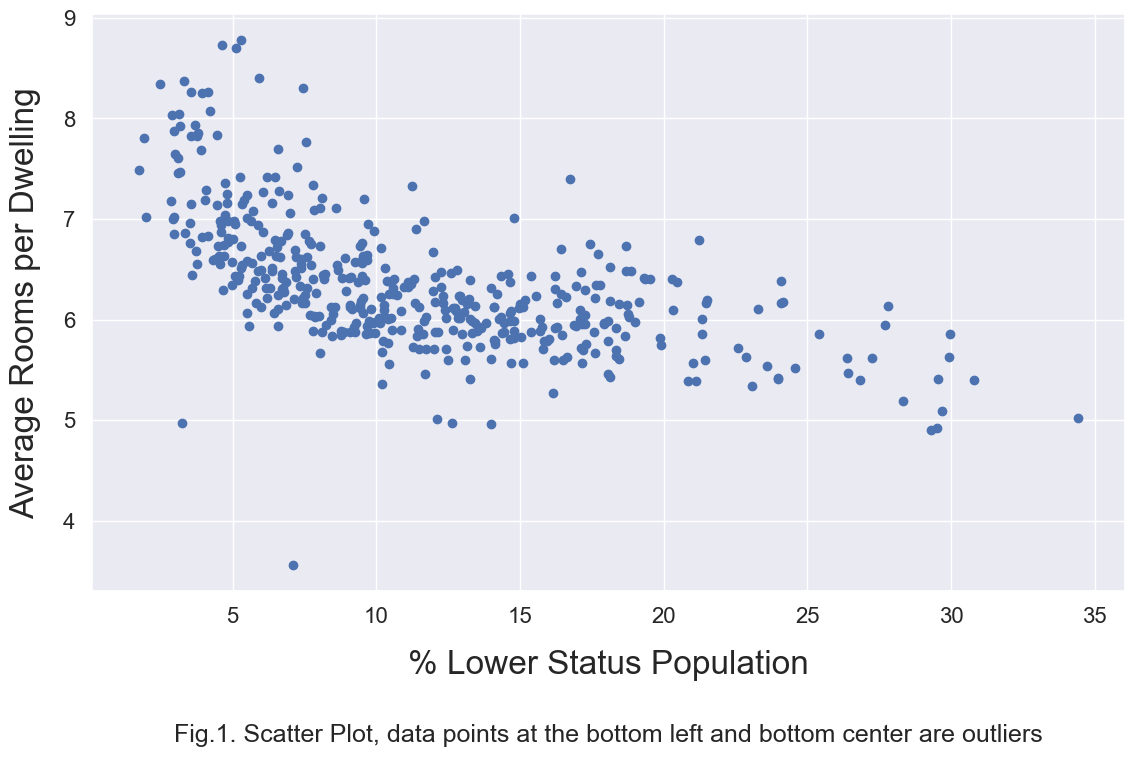

In [7]:
fig,ax = plt.subplots(figsize=(13.33, 7.5))
ax.scatter(df['LSTAT'], df['RM'])

# Add labels
ax.set_xlabel('% Lower Status Population', size=24, labelpad=16)
ax.set_ylabel('Average Rooms per Dwelling', size=24, labelpad=16)
plt.tick_params(axis='both', labelsize=16, length=8)

# Add caption
fignum = 1
figtxt = ". Scatter Plot, data points at the bottom left and bottom center are outliers"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-outlier-scatter-plot.png', bbox_inches='tight')

# Show plot
plt.show(); 

# Plot highlights a few data points far away from most of the other points.
# These data points (at the bottom left and bottom center) are likely  to be outliers.

A 13.33x7.5 plot is created by using plt.subplot() where it contains the parameter, figsize, being set to (13.33, 7.5), this is assigned to the variables, fig and ax. Next, a scatterplot is created using the ax.scatter() where it uses the columns, "LSAT", and "RM" from the df datframe. Next to label the scatterplot, the x axis is titled, "% Lower Status Population" with a font size of 24  and a labelpad value of 16, using ax.set_ylabel() where size parameter set to 24 labelpad is specified to 16. the y axis is titled, "Average Rooms per Dwelling" with a font size of 24  and a labelpad value of 16, using ax.set_ylabel() where size parameter set to 24 labelpad is specified to 16. Using the plt.tick_params function the tickers of the plot have a label fontsize of 16 and a length space of 8 for both x and y axis. 
To add caption, figum is assigned the value 1. Figtxt is assigned the string, " . Scatter Plot, data points at the bottom and bottom center are outliers". Then the string, "fig" is aggregated with str(fignum), (which convert fignum into a string) and figtxt. This aggregation is assigned to figcap. Next, ax.text() containing 0.5, -0.25, followed by figcap, then the fontsize parameter being set to 18, then ha specfied to 'center', va specified to center as well, and transformed set to ax.transAxes. This will set the caption under the x axis in a centered format. Lastly, the figure is saved using the plt.savefig() where the figure name is the aggregation of 'fig', the fignum convert in a string using the str(), and '-Outlier-scatter.png' 
plt.show will output the scatterplot along with its captions. 

## Create box plot

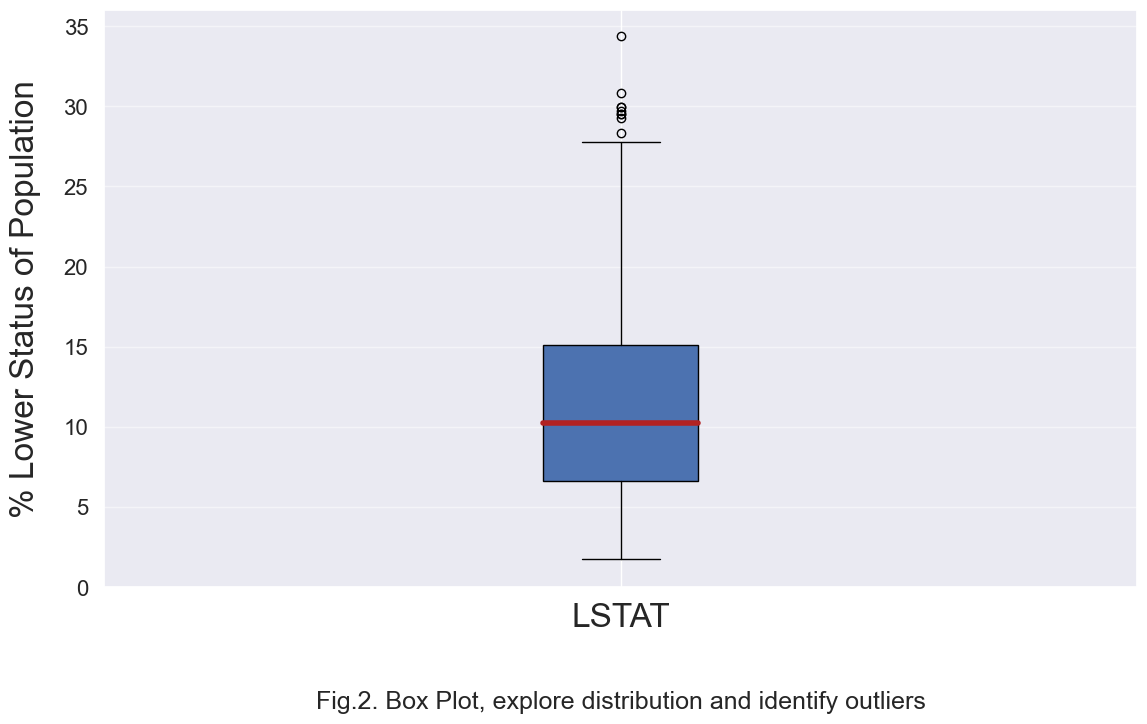

In [8]:
fig,ax = plt.subplots(figsize=(13.33, 7.5))
medianprops = dict(linestyle='-', linewidth=4, color='firebrick')
bp = plt.boxplot(df['LSTAT'], vert=1, whis=1.5, patch_artist=True, medianprops=medianprops)

ax.yaxis.grid(True, linestyle='-', which='major', alpha=0.5)
ax.set_ylabel('% Lower Status of Population', size=24, labelpad=16)
ax.set_ylim(bottom=0)
xtickNames = plt.setp(ax, xticklabels=['LSTAT'])
plt.setp(xtickNames, size=16)
plt.tick_params(axis='x', labelsize=24, length=8)
plt.tick_params(axis='y', labelsize=16, length=8)

# Add caption
fignum += 1
figtxt = ". Box Plot, explore distribution and identify outliers"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.2, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig("fig" + str(fignum) + '-outlier-box-plot.png', bbox_inches='tight')

plt.show();

# Plot highlights three data points above 30, with minor right skew
# These data points are outliers as they are not included in the box of other observations.

A 13.33x7.5 plot is created by using plt.subplot() where it contains the parameter, figsize, being set to (13.33, 7.5), this is assigned to the variables, fig and ax. A colored filled boxplot is created for the LSAT column of df using  function where plt.boxplot() function the vert parameter is specified to and whis set to 1.5, then patch_artist set to true,with medianprops specified to medianprops. 
Next, ax.yaxis.grid() is used to configure the grid lines for the y axis, where the grid lines are turned on using the major grid lines. the y axis is titled, "Lower Status of Population" with a font size of 24  and a labelpad value of 16, using ax.set_ylabel() where size parameter set to 24 labelpad is specified to 16. The y limit is set 0 using the ax.set_ylim where the parameter, bottom, is set to 0. The plt.setp() is used to add the properties of the LSAT column of df to the figure, this is assigned to xticksNames. Then fontsize of the labels are adjusted to the value of 16 using the plt.setp() function containing xticksNames followed by the fontsize parameter specified to 16. Using the plt.tick_params function the tickers of the plot have a label fontsize of 16 and a length space of 8 for both x and y axis. 
To add caption, figum is assigned the expression plus equal 1. Figtxt is assigned the string, " . Scatter Plot, data points at the bottom and bottom center are outliers". Then the string, "fig" is aggregated with str(fignum), which convert fignum into a string, and figtxt. This aggregation is assigned to figcap. Next, ax.text() containing 0.5, -0.2, followed by figcap, then the fontsize parameter being set to 18, then ha specfied to 'center', va specified to center as well, and transformed set to ax.transAxes. This will set the caption under the x axis in a centered format. Lastly, the figure is saved using the plt.savefig() where the figure name is the aggregation of 'fig', the fignum convert in a string using the str(), and '-Outlier-scatter. 
plt.show will output the scatterplot along with its captions.

## Create Histogram and Density Plots

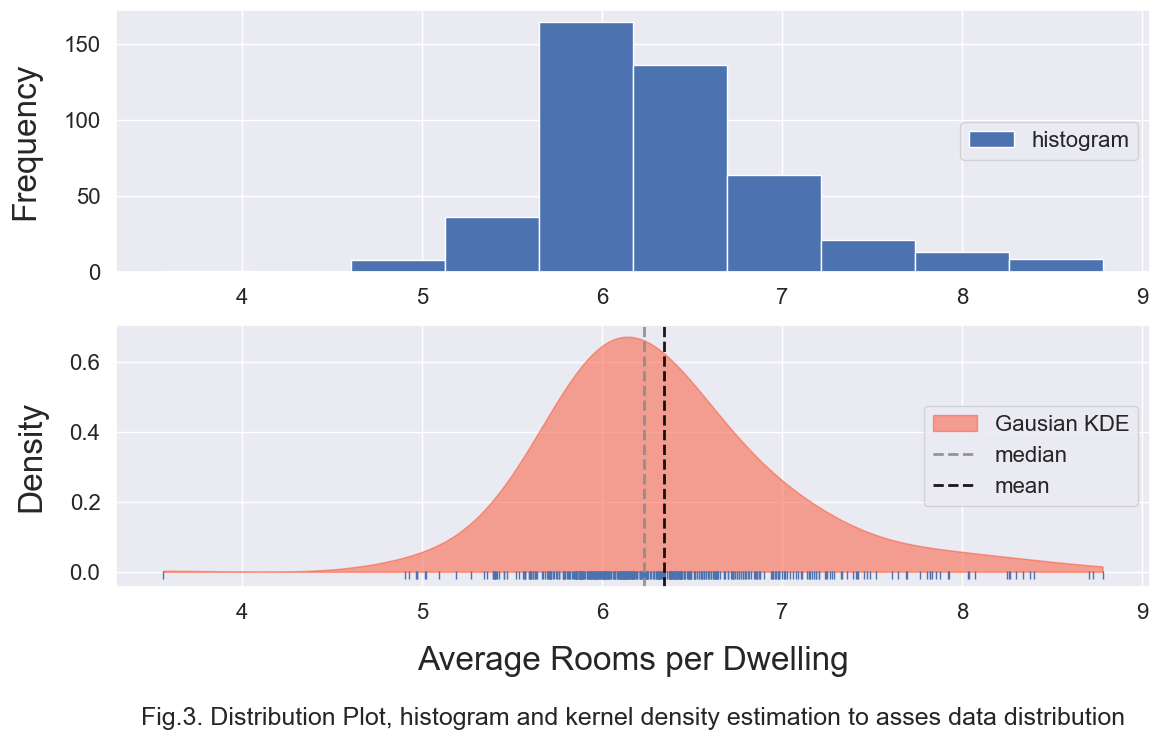

In [9]:
# Create a historm plot
fig,ax = plt.subplots(2, figsize=(13.33, 7.5))

# Get series for a single feature x
xi = df['RM'].values

# Create histogram
# https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html
ax[0].hist(xi, bins=10, label='histogram')

# Use Gaussian rule-of-thumb to attempt to find a nearly optimal smoothing length
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
from sklearn.neighbors import KernelDensity # as opposed to from scipy.stats import gaussian_kde
from sklearn.model_selection import GridSearchCV, LeaveOneOut # use GridSearchCV to optimize bandwidth 
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(np.resize(xi, (len(xi), 1)))
kde = KernelDensity(bandwidth=list(grid.best_params_.values())[0], kernel='gaussian')
kde.fit(np.resize(xi, (len(xi), 1)))

xd = np.linspace(xi.min(), xi.max(), len(xi))
logprob = kde.score_samples(np.resize(xd,(len(xd), 1))) # score_samples returns the log of the probability density

ax[1].fill_between(xd, np.exp(logprob), color='#fc4f30', label="Gausian KDE", alpha=0.5)
ax[1].plot(xi, np.full_like(xi, -0.01),'|', markeredgewidth=1)

ax[1].axvline(np.median(xi), color='#8b8b8b', linestyle='dashed',
            linewidth=2.0, label='median', alpha=0.9)
ax[1].axvline(np.mean(xi), color='black', linestyle='dashed',
            linewidth=2.0, label='mean', alpha=0.9)

# Add labels
ax[0].set_ylabel('Frequency', size=24, labelpad=16)
ax[1].set_ylabel('Density', size=24, labelpad=16)
ax[1].set_xlabel('Average Rooms per Dwelling', size=24, labelpad=16)
ax[0].tick_params(axis='both', labelsize=16, length=8)
ax[1].tick_params(axis='both', labelsize=16, length=8)
ax[0].legend(loc='center right', fontsize=16)
ax[1].legend(loc='center right', fontsize=16)

# Add caption
fignum += 1
figtxt = ". Distribution Plot, histogram and kernel density estimation to asses data distribution"
figcap = "Fig." + str(fignum) + figtxt
ax[1].text(0.5, -0.5, figcap, fontsize=18, ha='center', va='center', transform=ax[1].transAxes)
plt.savefig('fig' + str(fignum) + '-outlier-histogram-kde.png', bbox_inches='tight')

plt.show();

# Plot appears to be normally distributed, with right skew as mode < mean
# No clear outliers visible from histogram or KDE

A 13.33x7.5 plot is created by using plt.subplot() where it contains the parameter, figsize, being set to (13.33, 7.5), this is assigned to the variables, fig and ax. Then using df["RM"].values, the values of the "RM" column are converted into an array which is then assigned to xi. Then ax[0].hist() function containing xi, followed by the bins parameter set to 10 and the label parameter specified to "histogram", this will create a histogram that has a 10 bins for xi and it is labeled as histogram, this is put in the 0 index position of ax. 
KernelDensity is imported from the scikit library, submodule, neighbors to perform. Also GridSearchCV and LeaveOneout are imported from the scikit learn library, submodule, model_selection. 10 to the power of np.linspace(-1,1,100), which will create array of that wil return evenly spaced numbers from 1 to -1 using 100 samples generated, this is assigned to bandwidth. Then the GridSearchCV() function containing KernelDensity specified to 'gaussian, then a dictionary is presented where key is the string 'bandwidth' and the key is the variable bandwidth and the cv is LeaveOneOut. This will create a gridsearch to optimize bandwidth while using the leaveoneout cross validation method. Then the grid is fitted using an array based on np.resize, where the array starts at 1 and ends at sequence length of xi, increasing by 1. Then np.linespace is used for the array that starts at the minimum value of xi and ends at maximum value of xi, this is assigned to xd. To find the score samples, kde.score_samples containing the np.resize () function that is based on the array of xd. This is assigned to logprob. Then a Guassian kde plot created for the 1 index position of axes, where one vertical line indicates the mean of the xi and the other indicating median of xi. 
Next, for labelling the y axis for the plot that is in the 0 index position of ax is titled, "frequency", that has a font size of 24 and a label pad of 16. This is done by using the ax[0].set_ylabel(). Next for labelling the y axis for the plot that is in the 0 index position of ax is titled, "Average Rooms per Dwellings", that has a font size of 24 and a label pad of 16. This is done by using the ax[1].set_xlabel(). Next for labelling the y axis for the plot that is in the 0 index position of ax is titled, "Density", that has a font size of 24 and a label pad of 16. This is done by using the ax[1].set_ylabel(). Then for both ax[1] and ax[0] are both have label size as 16 and the length as a 8 for both axis by using the tick_params().
Then a legend is located center right with a font size of 16 using legend() for both ax[1]and ax[0]. To add caption, figum is assigned the expression plus equal 1. Figtxt is assigned the string, " . Distribution Plot, Histogram and Kernel Density estimation to assess data distribution". Then the string, "fig" is aggregated with str(fignum), which convert fignum into a string, and figtxt. This aggregation is assigned to figcap. Next, ax.text() containing 0.5, 0.5, followed by figcap, then the fontsize parameter being set to 18, then ha specified to 'center', va specified to center as well, and transformed set to ax.transAxes. This will set the caption under the x axis in a centered format. Lastly, the figure is saved using the plt.savefig() where the figure name is the aggregation of 'fig', the fignum convert in a string using the str(), and '-Outlier-histogram-kde.png. 
plt.show will output the plot along with its captions.

You can compare the kernel density estimate of x_point to the average kernel density estimate overall values in X_feature. The equation would then flag x_point if its outlier score fell below some defined threshold.

# Calculate Z - score

In [10]:
# Use the Z-score function in Scipy library to detect outliers
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0    0.567361  0.217241  1.177523  0.289712  0.024767  0.347505  0.012741   
1    0.558942  0.523527  0.476449  0.289712  0.631681  0.116298  0.474875   
2    0.558950  0.523527  0.476449  0.289712  0.631681  1.263325  0.158670   
3    0.556912  0.523527  1.196670  0.289712  0.728436  0.982574  0.703233   
4    0.542200  0.523527  1.196670  0.289712  0.728436  1.206274  0.404257   
..        ...       ...       ...       ...       ...       ...       ...   
447  0.544775  0.523527  0.239354  0.289712  0.283089  0.374529  0.126070   
448  0.551738  0.523527  0.239354  0.289712  0.283089  0.335607  0.396572   
449  0.545525  0.523527  0.239354  0.289712  0.283089  0.949544  0.905543   
450  0.525939  0.523527  0.239354  0.289712  0.283089  0.676299  0.845036   
451  0.550879  0.523527  0.239354  0.289712  0.283089  0.470728  0.542500   

          DIS       RAD       TAX   PTRATIO        AA     LSTAT      MEDV  

Stats is imported from the scipy library to compute statistical analysis. The np.abs() containing the stats.zscore(df) will compute the absolute value of the z scores for each observation of df. This is assigned to z. 
using the print function, z is outputted. 

In [11]:
## Set a threshold to identify an outlier
threshold = 3
print(np.where(z > 3))

# First array contains the list of row numbers 
# Second array respective column numbers

(array([  8,  48,  55,  57, 102, 141, 142, 152, 154, 155, 155, 156, 160,
       162, 163, 163, 199, 200, 203, 204, 208, 209, 210, 211, 212, 216,
       218, 219, 220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273,
       274, 276, 277, 282, 283, 283, 284, 351, 352, 353, 353, 354, 355,
       356, 356, 357, 358, 363, 364, 364, 365, 368, 369, 370, 371, 372,
       373, 382, 382, 383, 386, 387, 388, 389, 389, 390, 391, 392, 393,
       394, 396, 398, 399, 401, 405, 405, 406, 407, 408, 417], dtype=int64), array([12, 12,  1,  1, 11, 12,  3,  3,  3,  3, 11, 11,  3,  3,  3,  5,  1,
        1,  1,  1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,
        1,  5,  5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  7,  7,  1,  7,  7,
        7,  0,  3,  3,  3,  3,  3,  5,  5,  3,  3,  0,  3,  0,  0,  0, 12,
        0, 11, 11, 11,  0, 11, 11, 11, 11,  0,  0,  0,  0,  0, 11,  0, 11,
       11, 11, 11, 11], dtype=int64))


threshold is assigned the value of 3. Then using the print function, np.where(z>3) will output the observations where the z is  greater than 3 in df. 

## Calculate IQR

In [12]:
# Calculate interquartile range
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
print(iqr)

CRIM         1.141585
ZN          20.000000
INDUS       13.170000
CHAS         0.000000
NOX          0.158000
RM           0.708250
AGE         50.675000
DIS          3.046350
RAD          3.000000
TAX        134.250000
PTRATIO      3.400000
AA          18.440000
LSTAT        8.517500
MEDV         8.100000
dtype: float64


q1 is defined as df.quantile(0.25) which will output the 25% quartiles of each column df. q1 is defined as df.quantile(0.75) which will output the 75% quartiles of each column df. Iqr is defined as q3 - q1. iqr is outputted using the print function. 

In [13]:
# Locate all outliers
pd.DataFrame(df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))

# False means the values are valid
# True indicates presence of an outlier

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,AA,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,False,False,False,False,False,False,False,False,False,False,False,False,False,False
448,False,False,False,False,False,False,False,False,False,False,False,False,False,False
449,False,False,False,False,False,False,False,False,False,False,False,False,False,False
450,False,False,False,False,False,False,False,False,False,False,False,False,False,False


pd.DataFrame(df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr)) will create a data frame that gives a bool lean expression based on if the observations is less than q1 -1.5 * iqr or it's greater than q3 + 1.5 * iqr, if it's true than the observation will return as true. 

## Analyze Using KMeans

K-means algorithm is an iterative algorithm that tries to partition the data into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. The way k-means clustering follows these steps:

- Specify the number of clusters K
- Initialize centroids to shuffle and randomly select K data points without replacement
- Compute the sum of squared distance between data points and all centroids
- Assign each data point to the closest cluster (centroid)
- Computer the centroids for the clusters by taking the average of all the data points that belong to each cluster
- Iterate until there is no change to the centroids

From this dataset, we need to calculate some patterns, as we want to use an unsupervised method, so we won't know what to calculate exactly. This is where the domain expert will be very beneficial as he/she can look at the clusters created and help to explain the clusters.

## Find the optimal K value using the Elbow Plot to specify the number of clusters (K)

C:\Users\dgmur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dgmur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dgmur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the v

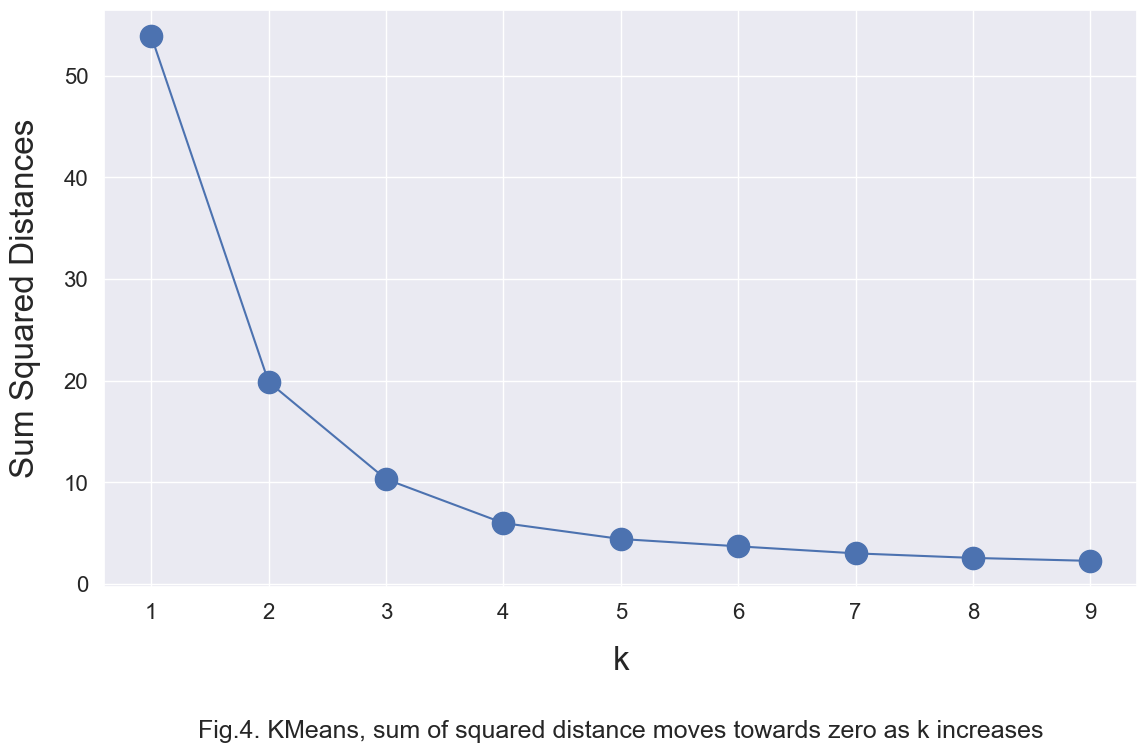

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Define the feature space
xi = df[['TAX', 'DIS']]

mms = MinMaxScaler()
mms.fit(xi)
data_transformed = mms.transform(xi)

# Find the optimal k value for the feature
sum_squared_distances = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    sum_squared_distances.append(km.inertia_)

# As k increases, the sum of squared distance tends to zero.
# Imagine setting k to its maximum value n (where n is number of samples)
# each sample would form its own cluster meaning sum of squared distances is zero

fig,ax = plt.subplots(figsize=(13.33, 7.5))
ax.plot(K, sum_squared_distances, markersize=16, marker='o')
ax.set_xlabel('k', size=24, labelpad=16)
ax.set_ylabel('Sum Squared Distances', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=16, length=8)

# Add caption
fignum += 1
figtxt = ". KMeans, sum of squared distance moves towards zero as k increases"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-kmeans-optimal-kvalue.png', bbox_inches='tight')

plt.show; # elbow is at k=3, indicating the optimal k is 3

MinMaxScaler is imported from the scikit learn submodule preprocessing for scaling a value that is in between 0 an 1. KMeans from the scikit learn submodule, cluster is imported to compute K-means. 
df followed by a nested list containing columns, TAX and DIS as strings, will create a subset containing TAX and DIS and is then assigned to the variable xi.  The minMaxScaler is assigned to mms, xi will be for fitting the mms. Then mms.transform(xi) will transform the values of df and it is assigned to the variable, data_transformed. 

sum_squared_distance is assigned an empty list. K is assigned a list of values ranging from 1 to but not including 10 using the range(1,10).
A for loop that uses k to pass through k: Inside the loop The KMeans function which contains the parameter n_clusters which is specified to k, and assigned to the variable km.  Km followed by the function  the fit() containing data_transformed. This will use the kmeans where the number of clusters is based on what element k is on of K. Then the sum_squared_distances(km.inetrtia_) will add the output of km to the list of sums_squared_distance. This loop will continue until k has reached the last element of K. Then, k will exit the loop. 
Then a 13.33x7.5 plot is created using plt.subplot containing figsize specified to (13.33, 7.5), this is assigned to the variables, fig, ax. the x axis is titled, "k" with a font size of 24  and a labelpad value of 16, using ax.set_ylabel() where size parameter set to 24 labelpad is specified to 16. the y axis is titled, "Sum Squared Distance" with a font size of 24  and a labelpad value of 16, using ax.set_ylabel() where size parameter set to 24 labelpad is specified to 16. Using the plt.tick_params function the tickers of the plot have a label fontsize of 16 and a length space of 8 for both x and y axis. 
To add caption, figum is assigned the expression plus equal 1. Figtxt is assigned the string, " Kmeans, sum of squared distance moves towards zero a s k increases". Then the string, "fig" is aggregated with str(fignum), which convert fignum into a string, and figtxt. This aggregation is assigned to figcap. Next, ax.text() containing 0.5, -0.25, followed by figcap, then the fontsize parameter being set to 18, then ha specfied to 'center', va specified to center as well, and transformed set to ax.transAxes. This will set the caption under the x axis in a centered format. Lastly, the figure is saved using the plt.savefig() where the figure name is the aggregation of 'fig', the fignum convert in a string using the str(), and '-kmeans-optimal-kvalue.png.' 
plt.show will output the elbow plot along with its captions.


## Initialize centroids to shuffle and randomly select K data points without replacement.

## As you see there is no training and testing data split. There is also no target variable (y), so the outcome is unknown.  As a part of the unsupervised learning method, clustering attempts to identify a relationship between n-observations (data points) without being trained by the response variable.

C:\Users\dgmur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


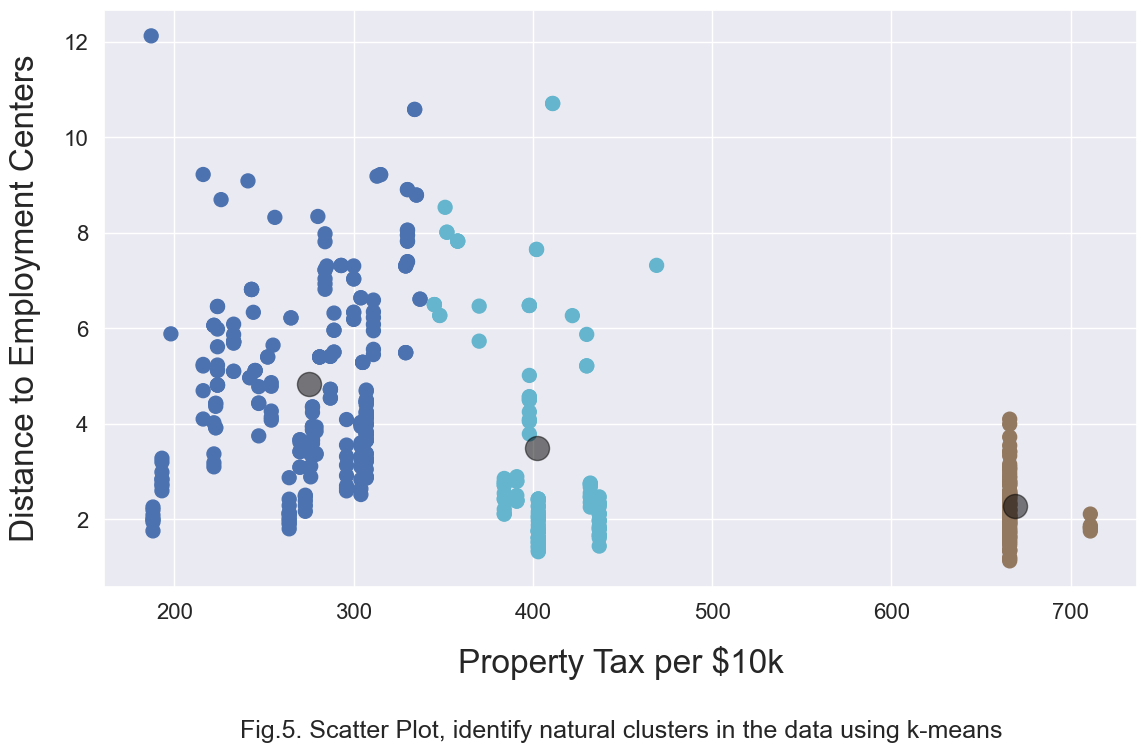

In [15]:
# Define the feature
x2d = xi.values

# Define the model
model = KMeans(n_clusters=3)

# Fit the model
model.fit(x2d)

# Assign a cluster to each example
labels = model.predict(x2d)

# Retrieve unique clusters
clusters = np.unique(labels)

import matplotlib
get_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']                       
colors = [color for color in get_colors]

fig,ax = plt.subplots(figsize=(13.33, 7.5))
ax.scatter(x2d[:, 0], x2d[:, 1], c=labels, 
           cmap=matplotlib.colors.ListedColormap(colors), s=100)

centers = model.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)

ax.set_xlabel('Property Tax per $10k', size=24, labelpad=16)
ax.set_ylabel('Distance to Employment Centers', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=16, length=8)

# Add Caption
fignum += 1
figtxt = ". Scatter Plot, identify natural clusters in the data using k-means"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-kmeans-proximity-centers.png', bbox_inches='tight')

# Show the plot
plt.show();

# K-means identifies three natural clusters from these two features

xi.values converts the values of xi into an array, this is assigned to the variable x2d. Then Kmeans(n_cluster = 3), will establish Kmeans algorithm with 3 centroids. This is assigned to model. Then model.fiT(x2d) will fit the Kmeans algorithm with the array fo x2d. Then model.predict(x2d) is used to assign the values of x2d into a cluster, the ouput is assigned to the variable, labels. np.unique(labels) is used to retrieve only the unique values of labels, this is assigned to clusters. matplotlib is imported for making plots. plt.rcParams['axes.prop_cycle'].by_key()['color'] is used to retrieve colors for plotting, this is assigned to the variable, get_colors. Then colors is converted into a list, then assigned to colors. a 13.33x7.5 plot is created using plt.subplot containing figsize specified to (13.33, 7.5), this is assigned to the variables, fig, ax. then, ax.scatter(x2d[:, 0], x2d[:, 1], c=labels, cmap=matplotlib.colors.ListedColormap(colors), s=100) will create a scatterplot consisting of all the rows of 0 index column and all the rows of 1 index column of x2d, the colors will be based on the variable label, the size of each scatter point has a value of 100, and then the color is derived from the colors variable. model.cluster_centers_ is assigned to the variable, clusters. ax.scatter containing all rows of both 0 index column and 1 index column of centers followed by c set to 'black' size specified to 300 and alpha equalling 0.5. This will display the centroid for each cluster as a black scatter point. the x axis is titled, "Property Tax per $10k" with a font size of 24  and a labelpad value of 16, using ax.set_ylabel() where size parameter set to 24 labelpad is specified to 16. the y axis is titled, "Distance to Employee Centers" with a font size of 24  and a labelpad value of 16, using ax.set_ylabel() where size parameter set to 24 labelpad is specified to 16. Using the plt.tick_params function the tickers of the plot have a label fontsize of 16 and a length space of 8 for both x and y axis.
 To add caption, figum is assigned the expression plus equal 1. Figtxt is assigned the string, " Scatter Plot, identify natural clusters in the data using k-means". Then the string, "fig" is aggregated with str(fignum), which convert fignum into a string, and figtxt. This aggregation is assigned to figcap. Next, ax.text() containing 0.5, -0.25, followed by figcap, then the fontsize parameter being set to 18, then ha specfied to 'center', va specified to center as well, and transformed set to ax.transAxes. This will set the caption under the x axis in a centered format. Lastly, the figure is saved using the plt.savefig() where the figure name is the aggregation of 'fig', the fignum convert in a string using the str(), and 'kmeans-proximity-centers.png.' 
plt.show will output the scatterplot along with its captions.


## Compute the sum of squared distance between data and all centroids

C:\Users\dgmur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


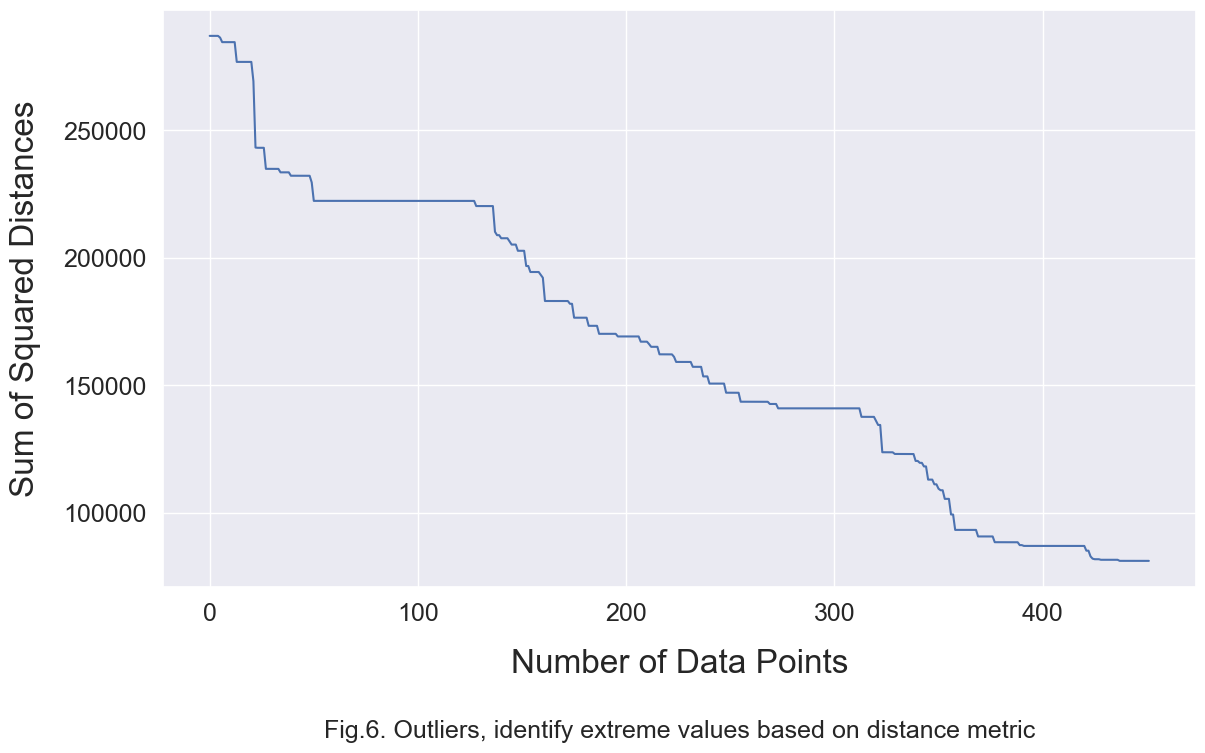

,sqdist,label
435,287123.05,1
434,287122.37,1
436,287122.35,1
437,287121.89,1
438,287119.65,1


In [16]:
# Square distance to cluster center
x_dist = model.transform(xi) ** 2
df = pd.DataFrame(x_dist.sum(axis=1).round(2), columns=['sqdist'])
df['label'] = labels

# Plot distance to identify outliers
fig,ax = plt.subplots(figsize=(13.33, 7.5))
ax.plot(np.arange(0, len(df['sqdist'])), df['sqdist'].sort_values(ascending=False))
ax.set_xlabel('Number of Data Points', size=24, labelpad=16)
ax.set_ylabel('Sum of Squared Distances', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=18, length=8)

# Add caption
fignum += 1
figtxt = ". Outliers, identify extreme values based on distance metric"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-kmeans-distances-proximity.png', bbox_inches='tight')

plt.show();

x_outliers = df.sort_values(['sqdist', 'label'], ascending=[0,1])[0:5]
x_outliers # these rows are 5 top outliers based on distance

# The top outlier candidates appear to be in cluster 1 (blue dots in chart above)
# Top outliers have the largest sum of squared distance values

model.transform(xi) ** 2 will standardize xi and then square it. The output is assigned to x_dist. Then pd.DataFrame(x_dist.sum(axis=1).round(2), columns=['sqdist']), the total sum by column of the array, x_dist is converted into a dataframe where the column index is s'qdist'. This is assigned as df. The a new column is added to df using the variable, label, the column name will be called "label". This is done by setting df['label'] equal to labels. Next, a 13.33x7.5 plot is created using plt.subplot containing figsize specified to (13.33, 7.5), this is assigned to the variables, fig, ax. The plot uses an array that has a start of 0 and a stop that is equal to the amount of observations that the sqdist column of df has. This is the x axis. Then for the y axis it is the sqdist column presented in decreasing order. the x axis is titled, "Number of data points" with a font size of 24  and a labelpad value of 16, using ax.set_ylabel() where size parameter set to 24 labelpad is specified to 16. the y axis is titled, "Sum of Squared Distances" with a font size of 24  and a labelpad value of 16, using ax.set_ylabel() where size parameter set to 24 labelpad is specified to 16. Using the plt.tick_params function the tickers of the plot have a label fontsize of 16 and a length space of 8 for both x and y axis.
 To add caption, figum is assigned the expression plus equal 1. Figtxt is assigned the string, "Outliers, identify extreme values based on distance metrics". Then the string, "fig" is aggregated with str(fignum), which convert fignum into a string, and figtxt. This aggregation is assigned to figcap. Next, ax.text() containing 0.5, -0.25, followed by figcap, then the fontsize parameter being set to 18, then ha specfied to 'center', va specified to center as well, and transformed set to ax.transAxes. This will set the caption under the x axis in a centered format. Lastly, the figure is saved using the plt.savefig() where the figure name is the aggregation of 'fig', the fignum convert in a string using the str(), and '-kmeans-distance-proximity.png.' 
plt.show will output the plot along with its captions. Then, df.sort_values(['sqdist', 'label'], ascending=[0,1])[0:5] will display the top 5 outliers based distance. The columns will consist of sqdist and label. 

## Assign each data point to the closest cluster (centroid)

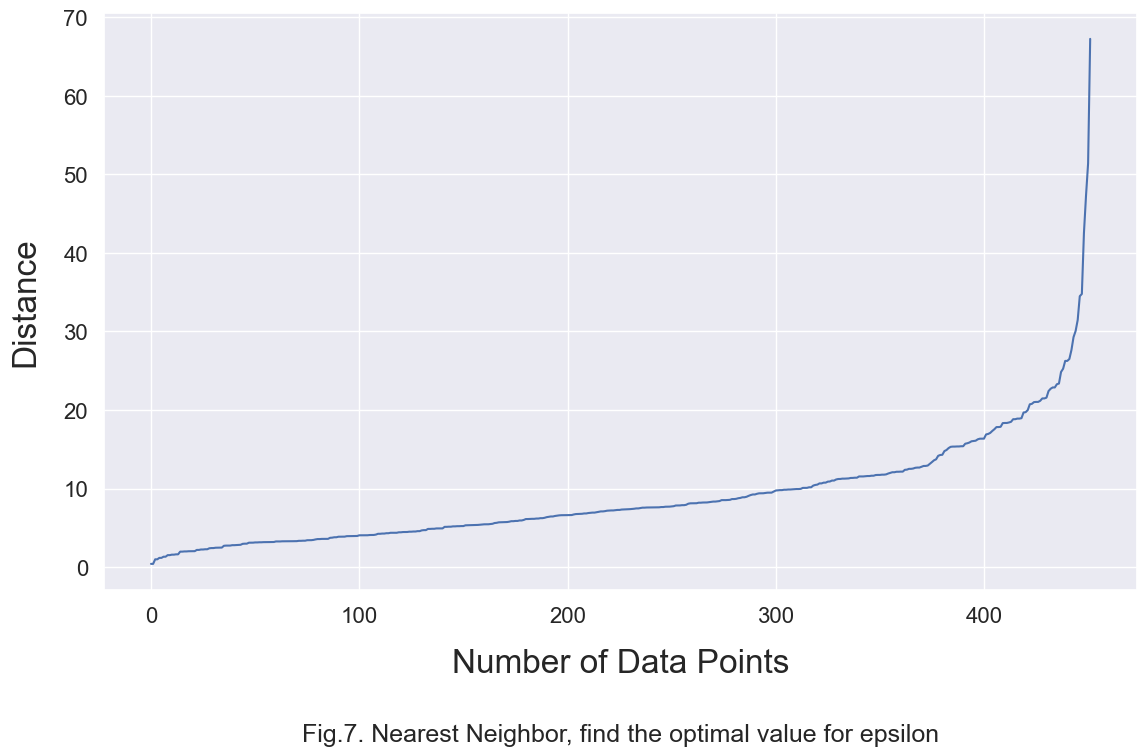

In [17]:
# Calculate the distance from each point to its closet neighbor 
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# distances is array that contains the distance to the closest n_neighbors
# indices is array that contains the index for each of those points

distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Plot distances
fig,ax = plt.subplots(figsize=(13.33, 7.5))
ax.plot(distances)
ax.set_ylabel('Distance', size=24, labelpad=16)
ax.set_xlabel('Number of Data Points', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=16, length=8)

# Add caption
fignum += 1
figtxt = ". Nearest Neighbor, find the optimal value for epsilon"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-dbscan-optimal-eps.png', bbox_inches='tight')

plt.show();

# Optimal value for epsilon is at point of max curvature, distance = 25

The NearestNeighbors is imported from the scikit submoule, neighbors, to compute the KNN algorithm. Then,  NearestNeighbors(n_neighbors=2) will create KNN where the number of neighbors is 2, this is assigned to the variable, neigh. Then neigh uses X for model fitting, the output is assigned to nbrs. nbrs.kneighbors(X) will perform a neighbors search on x, this assigned to variables, distances and indices. Then distances is sorted by row using np.sort(distances, axis=0). The output is now assigned to the variable distance. Then distance is sliced to include all the rows of column index 1, will update and assign it to the distance variable.  a 13.33x7.5 plot is created using plt.subplot containing figsize specified to (13.33, 7.5), this is assigned to the variables, fig, ax. The plot will use distance using ax.plot(distances). the x axis is titled, "Number of Data Points" with a font size of 24  and a labelpad value of 16, using ax.set_ylabel() where size parameter set to 24 labelpad is specified to 16. the y axis is titled, "Distance" with a font size of 24  and a labelpad value of 16, using ax.set_ylabel() where size parameter set to 24 labelpad is specified to 16. 
To add caption, figum is assigned the expression plus equal 1. Figtxt is assigned the string, "Find Nearest Neighbor, find the optimal value for epsilon". Then the string, "fig" is aggregated with str(fignum), which convert fignum into a string, and figtxt. This aggregation is assigned to figcap. Next, ax.text() containing 0.5, -0.25, followed by figcap, then the fontsize parameter being set to 18, then ha specfied to 'center', va specified to center as well, and transformed set to ax.transAxes. This will set the caption under the x axis in a centered format. Lastly, the figure is saved using the plt.savefig() where the figure name is the aggregation of 'fig', the fignum convert in a string using the str(), and 'dbscan-optimal-eps.png.' plt.show will output the plot. ce is assigned the value 25. 

# DBSCAN is another unsupervised learning algorithm. Again, notice, there are no training and testing datasets.

## Compute the centroids for the clusters by taking the average of all the data points that belong to each cluster

ValueError: 'c' argument has 3 elements, which is inconsistent with 'x' and 'y' with size 452.

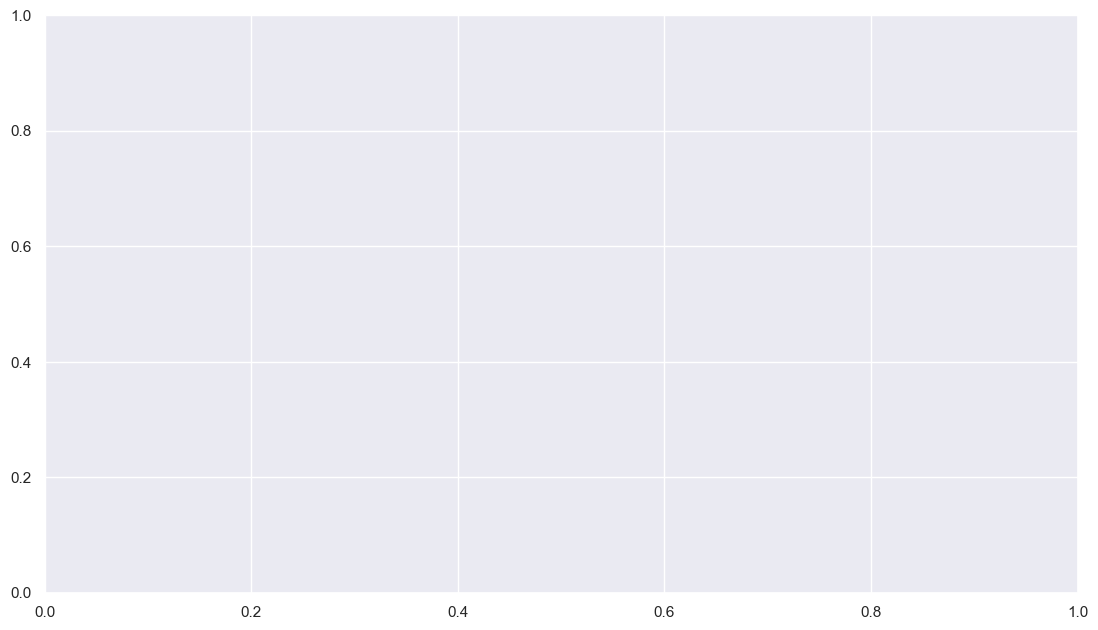

In [18]:
# Identify Noise Points from DBSCAN
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=25, min_samples=5) # min points based on domain knowledge
dbscan_model.fit_predict(X) # train the model with eps and min_samples
 # print 59, the total number of noisy points



# Map clusters to colors
colors = (['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c'] + ['firebrick', 'lime', 'black']) # account for all clusters
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

ax.scatter(x2d[:, 0], x2d[:, 1], c=labels,cmap=matplotlib.colors.ListedColormap(colors), s=100)

fig,ax = plt.subplots(figsize=(13.33, 7.5))
ax.scatter(x2d[:, 0], x2d[:, 1],c=vectorizer(clusters))

ax.set_xlabel('Property Tax per $10k', size=24, labelpad=16)
ax.set_ylabel('Distance to Employment Centers', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=16, length=8)

# Add Caption
fignum += 1
figtxt = ". Scatter Plot, identify natural clusters in the data using DBSCAN"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-dbscan-proximity.png', bbox_inches='tight')

plt.show();

# DBSCAN identifies more natural clusters than k-means (8 vs 3)
# Data points with 'black' color are considered to be potential outliers (label as -1)

DBSCAN is imported from scikit submodule library, cluster, to compute DBSCAN. Then, DBSCAN(eps=25, min_samples=5) is used to compute DBSCAN when 25 the eps and the minimum number of samples is 4. This is assigned to the variable, dbscan_model. dbscan_model.fit_predict(X) is used to train the DBSCAN model using X. Then a tuple of strings that consist of color names are assigned to a variable called color. Then the color  is converted into a tuple of arrays using np.vectorize(lambda x: colors[x % len(colors)], this is assigned to vectorize. Next, ax.scatter(x2d[:, 0], x2d[:, 1], c=labels, cmap=matplotlib.colors.ListedColormap(colors), s=100) will create a scatterplot consisting of all the rows of 0 index column and all the rows of 1 index column of x2d, the colors will be based on the variable label, the size of each scatter point has a value of 100, and then the color is derived from the colors variable. a 13.33x7.5 plot is created using plt.subplot containing figsize specified to (13.33, 7.5), this is assigned to the variables, fig, ax. then, ax.scatter(x2d[:, 0], x2d[:, 1], c=vectorizer(clusters) ) will create a scatterplot consisting of all the rows of 0 index column and all the rows of 1 index column of x2d, the colors will be based on the the cluster variable being vectorized.  the x axis is titled, "Property Tax per 10k" with a font size of 24  and a labelpad value of 16, using ax.set_ylabel() where size parameter set to 24 labelpad is specified to 16. the y axis is titled, "Distance to Employment Centers" with a font size of 24  and a labelpad value of 16, using ax.set_ylabel() where size parameter set to 24 labelpad is specified to 16. 
To add caption, figum is assigned the expression plus equal 1. Figtxt is assigned the string, "Scatter plotm identifying natural clusters in the data using DBSCAN". Then the string, "fig" is aggregated with str(fignum), which convert fignum into a string, and figtxt. This aggregation is assigned to figcap. Next, ax.text() containing 0.5, -0.25, followed by figcap, then the fontsize parameter being set to 18, then ha specfied to 'center', va specified to center as well, and transformed set to ax.transAxes. This will set the caption under the x axis in a centered format. Lastly, the figure is saved using the plt.savefig() where the figure name is the aggregation of 'fig', the fignum convert in a string using the str(), and 'dbscan-proximity.png.' plt.show will output the plot.

# Baseline Model with Linear Regression

## The model performance will be evaluated using the following two metrics:

R^2 (R squared) is the proportion of the variance in the dependent variable (y) that is explained (or predictable) from the independent variables (X).

RMSE (root mean squared error) is a quadratic scoring rule that measures the average magnitude of the error. RMSE is the square root of the average squared differences between prediction and actual observation. The closer to zero, the better.

In [19]:
# Import machine learning libraries and modules
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summarize the shape of the original training dataset
print('Original Shape: {} {}'.format(X_train.shape, y_train.shape))

# Declare data preprocessing steps
numeric_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# categorical_features = [None]
# categorical_transformer = Pipeline(steps=[
#                             ('onehot', OneHotEncoder(handle_unknown='ignore'))
#                             ])

preprocessor = ColumnTransformer(transformers=[
                ('num', numeric_transformer, numeric_features)
#                 ('cat', categorical_transformer, categorical_features)
                ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LinearRegression())
                          ])
 
# Tune model using cross-validation pipeline
clf = pipeline 
clf.fit(X_train, y_train)

# Summarize the shape of the updated training dataset
print('Updated Shape: {} {}'.format(X_train.shape, y_train.shape))

# Evaluate model pipeline on test data
yhat = clf.predict(X_test)
print('-----Baseline Model Performance-----')
print('R^2: {}'.format(r2_score(y_test, yhat)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, yhat))))

Original Shape: (361, 13) (361, 13)
Updated Shape: (361, 13) (361, 13)
-----Baseline Model Performance-----
R^2: 0.988199761031772
RMSE: 0.31790228175953267


train_test_split is imported from scikit ubmodule model_selection, to split the data into training and testing subsets
ColumnTransformer is imnported from the scikit submodule compose, to separate and apply different types of transformations on a dataset
Pipeline is imported from the scikit submodel pipeline  to apply a list of transformations and a final estimator
PolynomialFeatures is imported form scikit submodel preprocessing to generate polynomial combinations on dataset.
StandardScaler and OneHot Encoder are imported from scikit submodule preprocessing to standardize datasets and to perform OneHotEncoding on categorical variables 
LinearRegression is imported from scikit submodule linear_model to perform linear regression
mean_squared_error and r2_score are imported from scikit submodule metrics to compute mean square error and r squared value   


Then inside the train_test_split() function is X and Y followed by the test_size parameter specified to 0.2 and the random_state parameter specified to 42. This will create 80% training, 20% test split for X and Y, and this will be assigned to 4 variables, X_train, Y_train (80% of the data) X_test and Y_test (20% of the data). Then using the print function contains, "Original shape:" followed by 2 sets of curly brackets, these are placeholders for values of format(). Then the format function containing X_train.shape, which displays the rows and columns of x_train, and y_train.shape, which displays the rows and columns of y_train. X_train.shape will be placed in the first set of curly brackets and y_train.shape will be placed in the 2nd set of curly brackets. The a list of values that range form 1 to 12 are assigned to the variable, numeric_features. Then inside the pipeline function the scaler is implemented by using the StandardScaler function, this is then assigned to numeric_transformer. Next using the ColumnTransformer function  numeric_transformer will be applied to  numeric_features, and categorical transformer applied to categorical_features, This is assigned to preprocessor. Then using the pipeline function and the steps parameter is specified to the preprocessor step being assigned to the preprocessor variable and the classifier being assigned to the LinearRegression() function. 
Pipeline is equal to clf, and clf uses x_train and y_train for fitting the model. Then using the print function contains, "Updated Shape:" followed by 2 sets of curly brackets, these are placeholders for values of format(). Then the format function containing X_train.shape, which displays the rows and columns of x_train, and y_train.shape, which displays the rows and columns of y_train. X_train.shape will be placed in the first set of curly brackets and y_train.shape will be placed in the 2nd set of curly brackets. Then clf.predict(X_test) will evaulate the model using the X_test to predict y_test. This is assigned to yhat. Next,'-----Baseline Model Performance-----' using the print function. Then using the print function, "R^2" followed by a set of curly brackets where the value in format() will replace the curly bracket. In this case it would be the output of r2_score for yhat and y_test. Then using the print function, "RMSE:" followed by a set of curly brackets where the value in format() will replace the curly bracket. In this case it would be the output of square root of the mean_square_error function which contains y_test and yhat. 


## The baseline model with Linear Regression identified and removed 0 outliers, and the model achieved an R^2 of 98.82 and RMSE of 0.32.

# Isolation Forest

Isolation Forest, or iForest, is built on the basis of decision trees. Partitions are created in these trees by first randomly selecting a feature and then selecting a random split value between the minimum and maximum value of the selected feature. Since outliers (in theory) are less frequent and different in terms of values than normal observations, fewer splits should be required to identify these abnormal points. The algorithm provides the "contamination" argument that defines the expected ratio of outliers in the data and has a default value of 0.1.

In [20]:
from sklearn.ensemble import IsolationForest



# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summarize the shape of the original training dataset
print('Original Shape: {} {}'.format(X_train.shape, y_train.shape))

# Identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)

# Select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# Tune model using cross-validation pipeline
clf = pipeline
clf.fit(X_train, y_train)

# Summarize the shape of the updated training dataset
print('Updated Shape: {} {}'.format(X_train.shape, y_train.shape))

# Evaluate model pipeline on test data
yhat = clf.predict(X_test)
print('R^2: {}'.format(r2_score(y_test, yhat)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, yhat))))

Original Shape: (361, 13) (361, 13)
Updated Shape: (325, 13) (325, 13)
R^2: 0.986300241268605
RMSE: 0.34253480226849814


IsolationForest was imported from the scikit submodule ensemble to compute the isolation forest algorithm. Then inside the train_test_split() function is X and Y followed by the test_size parameter specified to 0.2 and the random_state parameter specified to 42. This will create 80% training, 20% test split for X and Y, and this will be assigned to 4 variables, X_train, Y_train (80% of the data) X_test and Y_test (20% of the data). Then using the print function contains, "Original shape:" followed by 2 sets of curly brackets, these are placeholders for values of format(). Then the format function containing X_train.shape, which displays the rows and columns of x_train, and y_train.shape, which displays the rows and columns of y_train. X_train.shape will be placed in the first set of curly brackets and y_train.shape will be placed in the 2nd set of curly brackets. Then, IsolationForest(contamination=0.1) will use isolation Forest where the expected ratio of outliers is 0.1. This is assigned to the variable iso. Then iso.fit_predict(X_train) is used to fit the isolation forest model using x_train and then predict the response (Y) values. This is assigned yhat. The mask is equal to the yhat values where there are not equal to -1. Then x_train, y_train are assigned to rows that are not considered outliers(mask). Pipeline is equal to clf, and clf uses x_train and y_train for fitting the model. Then using the print function contains, "Updated Shape:" followed by 2 sets of curly brackets, these are placeholders for values of format(). Then the format function containing X_train.shape, which displays the rows and columns of x_train, and y_train.shape, which displays the rows and columns of y_train. X_train.shape will be placed in the first set of curly brackets and y_train.shape will be placed in the 2nd set of curly brackets. Then clf.predict(X_test) will evaulate the model using the X_test to predict y_test. This is assigned to yhat.  Then using the print function, "R^2" followed by a set of curly brackets where the value in format() will replace the curly bracket. In this case it would be the output of r2_score for yhat and y_test. Then using the print function, "RMSE:" followed by a set of curly brackets where the value in format() will replace the curly bracket. In this case it would be the output of square root of the mean_square_error function which contains y_test and yhat.

## Isolation Forest identified and removed 36 outliers, but the model only achieved an R^2 of 98.75 and RMSE of 0.33.

# Minimum Covariance using Elliptic Envelope

Minimum Covariance Determinant, or MCD, generalizes the assumption that input variables have a Gaussian distribution. Rather than applying simple statistical methods to a single input variable, MCD defines a multi-dimensional Gaussian feature space to identify values outside of the shape. The algorithm provides the "contamination" argument that defines the expected ratio of outliers in the data.

In [21]:
from sklearn.covariance import EllipticEnvelope



# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summarize the shape of the original training dataset
print('Original Shape: {} {}'.format(X_train.shape, y_train.shape))

# Identify outliers in the training dataset
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(X_train)

# Select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# Tune model using cross-validation pipeline
clf = pipeline
clf.fit(X_train, y_train)

# Summarize the shape of the updated training dataset
print('Updated Shape: {} {}'.format(X_train.shape, y_train.shape))

# Evaluate model pipeline on test data
yhat = clf.predict(X_test)
print('R^2: {}'.format(r2_score(y_test, yhat)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, yhat))))

Original Shape: (361, 13) (361, 13)
Updated Shape: (357, 13) (357, 13)
R^2: 0.987961452884546
RMSE: 0.3210962860357048


EllipticEnvelope is imported from the scikit submodule covariance, this is used to perform the MCD algorithm.  Then inside the train_test_split() function is X and Y followed by the test_size parameter specified to 0.2 and the random_state parameter specified to 42. This will create 80% training, 20% test split for X and Y, and this will be assigned to 4 variables, X_train, Y_train (80% of the data) X_test and Y_test (20% of the data). Then using the print function contains, "Original shape:" followed by 2 sets of curly brackets, these are placeholders for values of format(). Then the format function containing X_train.shape, which displays the rows and columns of x_train, and y_train.shape, which displays the rows and columns of y_train. X_train.shape will be placed in the first set of curly brackets and y_train.shape will be placed in the 2nd set of curly brackets. Then, Elliptic(contamination=0.1) will use Elliptic Envelope where the expected ratio of outliers is 0.1. This is assigned to the variable ee. Then ee.fit_predict(X_train) is used to fit Elliptic Envelope model using x_train and then predict the response (Y) values. This is assigned yhat. The mask is equal to the yhat values where there are not equal to -1. Then x_train, y_train are assigned to rows that are not considered outliers(mask). Pipeline is equal to clf, and clf uses x_train and y_train for fitting the model. Then using the print function contains, "Updated Shape:" followed by 2 sets of curly brackets, these are placeholders for values of format(). Then the format function containing X_train.shape, which displays the rows and columns of x_train, and y_train.shape, which displays the rows and columns of y_train. X_train.shape will be placed in the first set of curly brackets and y_train.shape will be placed in the 2nd set of curly brackets. Then clf.predict(X_test) will evaulate the model using the X_test to predict y_test.Then using the print function, "R^2" followed by a set of curly brackets where the value in format() will replace the curly bracket. In this case it would be the output of r2_score for yhat and y_test. Then using the print function, "RMSE:" followed by a set of curly brackets where the value in format() will replace the curly bracket. In this case it would be the output of square root of the mean_square_error function which contains y_test and yhat.

## Minimum Covariance Determinant identified and removed 5 outliers, and the model achieved an R^2 of 98.80 and RMSE of 0.32.

# Local Outlier Factor (LOF)

LOF is a model that attempts to leverage the concept of nearest neighbors for outlier detection. Each observation is assigned a score of how isolated or how likely it is to be an outlier based on the size of its local neighborhood. LOF provides the "contamination" argument, which is the expected percentage of outliers in the dataset and defaults to 0.1.

In [22]:
from sklearn.neighbors import LocalOutlierFactor


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summarize the shape of the original training dataset
print('Original Shape: {} {}'.format(X_train.shape, y_train.shape))

# Identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

# Select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# Tune model using cross-validation pipeline
clf = pipeline
clf.fit(X_train, y_train)

# Summarize the shape of the updated training dataset
print('Updated Shape: {} {}'.format(X_train.shape, y_train.shape))

# Evaluate model pipeline on test data
yhat = clf.predict(X_test)
print('R^2: {}'.format(r2_score(y_test, yhat)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, yhat))))

Original Shape: (361, 13) (361, 13)
Updated Shape: (318, 13) (318, 13)
R^2: 0.9836954968516617
RMSE: 0.3736818706866314


LocalOutlierFactor is imported from the scikit submodule neighbors in order to compute the local outlier factor algorithm.  Then inside the train_test_split() function is X and Y followed by the test_size parameter specified to 0.2 and the random_state parameter specified to 42. This will create 80% training, 20% test split for X and Y, and this will be assigned to 4 variables, X_train, Y_train (80% of the data) X_test and Y_test (20% of the data). Then using the print function contains, "Original shape:" followed by 2 sets of curly brackets, these are placeholders for values of format(). Then the format function containing X_train.shape, which displays the rows and columns of x_train, and y_train.shape, which displays the rows and columns of y_train. X_train.shape will be placed in the first set of curly brackets and y_train.shape will be placed in the 2nd set of curly brackets. Then, LocalOutlierFactor will use LOC where the expected ratio of outliers is 0.1. This is assigned to the variable lof. Then loc.fit_predict(X_train) is used to fit the local outlier factor model using x_train and then predict the response (Y) values. This is assigned yhat. The mask is equal to the yhat values where there are not equal to -1. Then x_train, y_train are assigned to rows that are not considered outliers(mask). Pipeline is equal to clf, and clf uses x_train and y_train for fitting the model. Then using the print function contains, "Updated Shape:" followed by 2 sets of curly brackets, these are placeholders for values of format(). Then the format function containing X_train.shape, which displays the rows and columns of x_train, and y_train.shape, which displays the rows and columns of y_train. X_train.shape will be placed in the first set of curly brackets and y_train.shape will be placed in the 2nd set of curly brackets. Then clf.predict(X_test) will evaulate the model using the X_test to predict y_test.Then using the print function, "R^2" followed by a set of curly brackets where the value in format() will replace the curly bracket. In this case it would be the output of r2_score for yhat and y_test. Then using the print function, "RMSE:" followed by a set of curly brackets where the value in format() will replace the curly bracket. In this case it would be the output of square root of the mean_square_error function which contains y_test and yhat.

## LOF identified and removed 3 outliers, but the model only achieved an R^2 of 98.37 and RMSE of 0.37.

# Support Vector Machine

SVM algorithm is primarily used for binary classification problems, but it can also be used for one-class classification to identify outliers. One Class SVM provides the "nu" argument to specify the approximate ratio of outliers in the dataset and a default value of 0.1.

In [23]:
from sklearn.svm import OneClassSVM


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summarize the shape of the original training dataset
print('Original Shape: {} {}'.format(X_train.shape, y_train.shape))

# Identify outliers in the training dataset
osvm = OneClassSVM(nu=0.01)
yhat = osvm.fit_predict(X_train)

# Select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# Tune model using cross-validation pipeline
clf = pipeline
clf.fit(X_train, y_train)

# Summarize the shape of the updated training dataset
print('Updated Shape: {} {}'.format(X_train.shape, y_train.shape))

# Evaluate model pipeline on test data
yhat = clf.predict(X_test)
print('R^2: {}'.format(r2_score(y_test, yhat)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, yhat))))

Original Shape: (361, 13) (361, 13)
Updated Shape: (358, 13) (358, 13)
R^2: 0.9881972981996546
RMSE: 0.3179354547784919


OneClassSVM is imported from the scikit submodule, svm in order to compute the OneClassSVM algorithm. Then inside the train_test_split() function is X and Y followed by the test_size parameter specified to 0.2 and the random_state parameter specified to 42. This will create 80% training, 20% test split for X and Y, and this will be assigned to 4 variables, X_train, Y_train (80% of the data) X_test and Y_test (20% of the data). Then using the print function contains, "Original shape:" followed by 2 sets of curly brackets, these are placeholders for values of format(). Then the format function containing X_train.shape, which displays the rows and columns of x_train, and y_train.shape, which displays the rows and columns of y_train. X_train.shape will be placed in the first set of curly brackets and y_train.shape will be placed in the 2nd set of curly brackets. Then, OneClassSVM will use One Class Support Vector Machine where the expected ratio of outliers is 0.1. This is assigned to the variable ovsm. Then ovsm.fit_predict(X_train) is used to fit the ovsm model using x_train and then predict the response (Y) values. This is assigned yhat. The mask is equal to the yhat values where there are not equal to -1. Then x_train, y_train are assigned to rows that are not considered outliers(mask). Pipeline is equal to clf, and clf uses x_train and y_train for fitting the model. Then using the print function contains, "Updated Shape:" followed by 2 sets of curly brackets, these are placeholders for values of format(). Then the format function containing X_train.shape, which displays the rows and columns of x_train, and y_train.shape, which displays the rows and columns of y_train. X_train.shape will be placed in the first set of curly brackets and y_train.shape will be placed in the 2nd set of curly brackets. Then clf.predict(X_test) will evaulate the model using the X_test to predict y_test.Then using the print function, "R^2" followed by a set of curly brackets where the value in format() will replace the curly bracket. In this case it would be the output of r2_score for yhat and y_test. Then using the print function, "RMSE:" followed by a set of curly brackets where the value in format() will replace the curly bracket. In this case it would be the output of square root of the mean_square_error function which contains y_test and yhat.

# Plotting the Outliers

You can see with the following code, there are some outliers in this dataset.

Let's look at some of the methods for detecting outliers. We will only use the Elliptic Envelope, Minimum Covariance Determinant, and OneClassSVM

- By fitting an ellipse around the core data points, the Elliptic Envelope discovers outliers in a Gaussian distributed dataset. It is quite sensitive to the data's heterogeneous structure.

- The Minimal Covariance Determinant focuses on the data distribution's major mode and also assumes the data is Gaussian distributed.

- The One-Class SVM is an unsupervised outlier detection algorithm that does not presume a parametric data distribution and can fit more complex forms.

In [24]:
from sklearn.datasets import load_boston
X1 = load_boston()['data'][:, [8, 10]]  # RAD & pupil-teacher-ratio: accessibility to radial highways
X2 = load_boston()['data'][:, [5, 12]]  # RM & LSAT: percent lower stats of the population

# Define "classifiers" to be used
classifiers = {
    "Elliptic Envelope": EllipticEnvelope(support_fraction=1., #support_fraction = the proportion of points to be included in the support of the estimate
                                             contamination=0.261),
    "Minimum Covariance Determinant": EllipticEnvelope(contamination=0.261),
    "OneClass SVM": OneClassSVM(nu=0.261, gamma=0.05)}
colors = ['m', 'g', 'b']
legend1 = {}
legend2 = {}


# Outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(-8, 28, 500), np.linspace(3, 40, 500))
xx2, yy2 = np.meshgrid(np.linspace(3, 10, 500), np.linspace(-5, 45, 500))
xx3, yy3 = np.meshgrid(np.linspace(-8, 28, 500), np.linspace(3, 40, 500))

for i, (clf_name, clf) in enumerate(classifiers.items()):

    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

    plt.figure(2)
    clf.fit(X2)
    Z2 = clf.decision_function(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    legend2[clf_name] = plt.contour(
        xx2, yy2, Z2, levels=[0], linewidths=2, colors=colors[i])
   

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results
plt.figure(1)  
plt.title("Outlier detection on the boston housing dataset")
plt.scatter(X1[:, 0], X1[:, 1], color='black')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate("several confounded points", xy=(24, 19),
             xycoords="data", textcoords="data",
             xytext=(13, 10), bbox=bbox_args, arrowprops=arrow_args)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0],
            legend1_values_list[2].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("accessibility to radial highways")
plt.xlabel("pupil-teacher ratio by town")

legend2_values_list = list(legend2.values())
legend2_keys_list = list(legend2.keys())

plt.figure(2)  # "banana" shape
plt.scatter(X2[:, 0], X2[:, 1], color='black')
plt.xlim((xx2.min(), xx2.max()))
plt.ylim((yy2.min(), yy2.max()))
plt.legend((legend2_values_list[0].collections[0],
            legend2_values_list[1].collections[0],
            legend2_values_list[2].collections[0]),
           (legend2_keys_list[0], legend2_keys_list[1], legend2_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("% lower status of the population")
plt.xlabel("average number of rooms per dwelling")





plt.show()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


load_boston is imported from the scikit submodule datasets. This is datset that is from the scikit learn library. X1 is assigned all rows from columns 8 and 10 from load_boston, X2 is assigned all rows from columns 5 and 12Then a dictionary with multiple keys and values are presented: The "Elliptic Envelope has a value EllipticEnvelope(support_fraction=1., contamination=0.261), where the 1 is the proportion of points , and 0.261 is the proportion of outliers in the dataset. Then, "One Class SVM" has a value OneClassSVM(nu=0.261, gamma=0.05), the upper bound is set to 0.261 and the kernel coefficient is set to 0.05. List a string containing m,g,b are assigned to colors. legend1 and legend2 are assigned an empty dictionary.  np.meshgrid(np.linspace(-8, 28, 500), np.linspace(3, 40, 500)) is used to as a meshgrid for the contour plot, this assigned to xxy1, yy2.
p.meshgrid(np.linspace(3, 10, 500), np.linspace(-5, 45, 500)) is used as a meshgrid for the contour, this is assigned to xx2,yy2. np.meshgrid(np.linspace(-8, 28, 500), np.linspace(3, 40, 500)) is used as a meshgrid for the contour plot.  The for loop will use i to iterate to classify each subset of the data of X1 and X2, then clf.decision_function will compute z1 and z2 for each point of the meshgrid, then the reshape to equal meshgrid. 2 plots are created where each of them contains a scatterplot to indicate the original distribution in black. Then the contour is used for each plot as well, and a legend is added to each plot indicate color and classifier. The y axis is labeled, "% lower status of the population" and x axis labeled "average of number of rooms per dwelling, using plt.ylabel() and plt.xlabel().
Then plt.show() will output the plots.

# Conclusion 

Outliers are a simple concept - values that are notably different from other data points, and they can cause problems in statistical procedures. A univariate outlier is a data point that consists of an extreme value on one variable, while a multivariate outlier is a combination of unusual scores on at least two variables. Both types of outliers can influence the outcome of statistical analyses and machine learning models. Unfortunately, there are no strict statistical rules for definitively identifying outliers. Finding outliers depends on subject-area knowledge and an understanding of the data collection process. While there is no solid mathematical definition, the guidelines and statistical tests described in this article can be used to successfully find outlier candidates.

